In [1]:
%matplotlib inline
import numpy as np
from nicks_plot_utils import Hist1D, Hist2D
import matplotlib.pyplot as plt
import pandas as pd
from lmfit.models import *

In [2]:
mu = 0.0
sigma = 0.2
num = 10_000_000

data = pd.DataFrame({'W' : np.random.normal(mu, sigma, num),
                     'y' : np.random.normal(mu, 0.1, num),
                     'z' : np.random.normal(0.5, 0.5, num)})

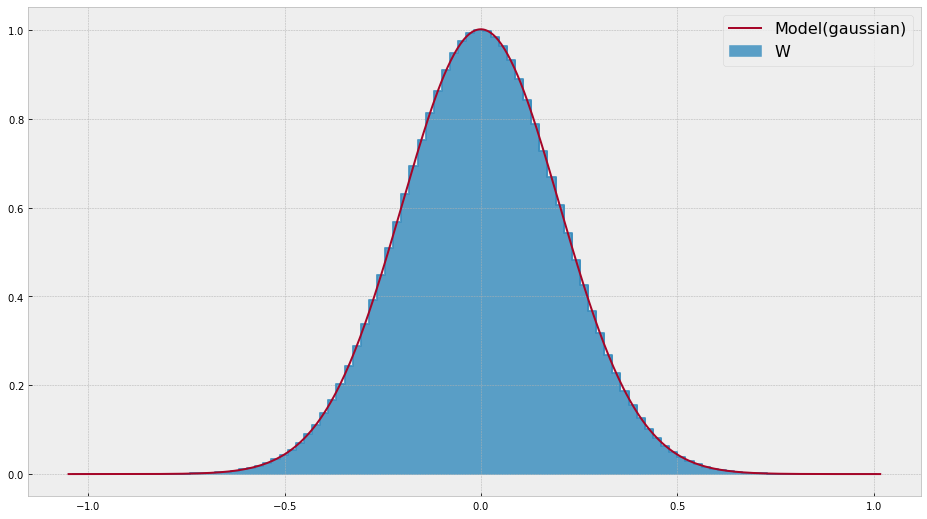

In [3]:
testHist = Hist1D(data=data.W)
testHist.histogram(filled=True)
testHist.fitGaussian()

Need to start with data or set xrange=[left,right]


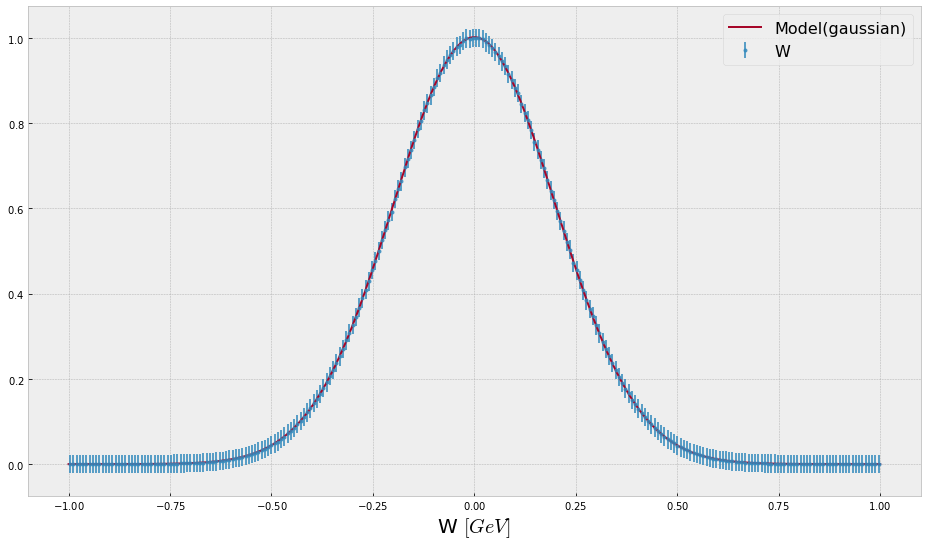

In [4]:
fig, ax = plt.subplots(figsize=(16,9))
testHist = Hist1D(bins=250, name='W $[GeV]$')
testHist.fill(data.W)
testHist.errorbar()
testHist.fitGaussian()

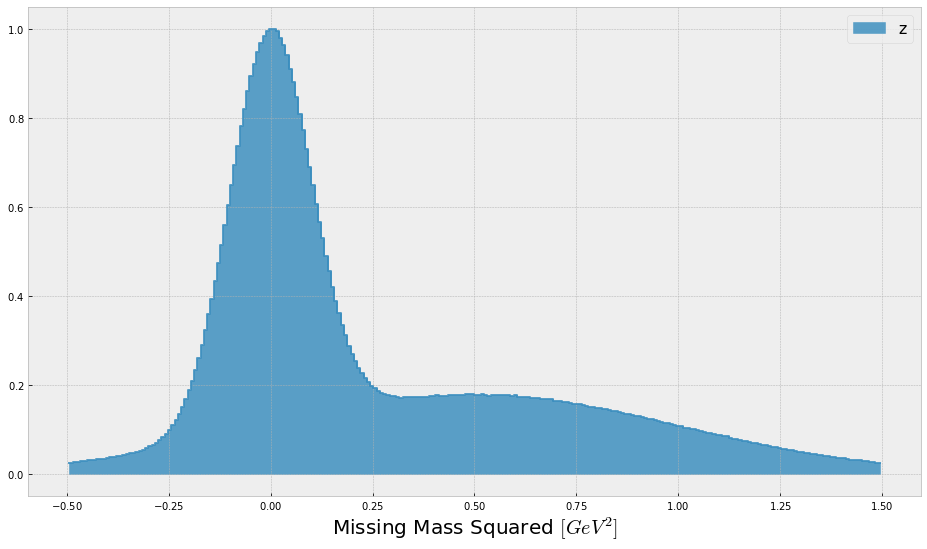

In [5]:
testHist2 = Hist1D(xrange=[-0.5, 1.5], bins=250, name='Missing Mass Squared $[GeV^2]$')
testHist2.fill(data.y)
testHist2.fill(data.z)
testHist2.histogram(filled=True)


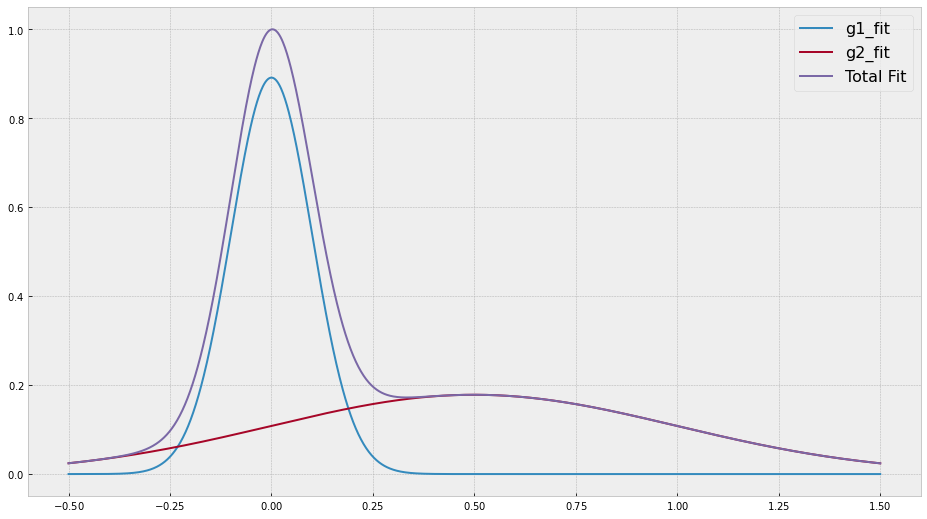

In [6]:
testHist2.histogram(ax, filled=True)

gauss1 = GaussianModel(prefix='g1_')
pars = gauss1.guess(testHist2.y, x=testHist2.x)

pars['g1_center'].set(value=0.0)
pars['g1_sigma'].set(value=0.2)


gauss2 = GaussianModel(prefix='g2_')
pars.update(gauss2.make_params())

pars['g2_center'].set(value=-0.3)
pars['g2_sigma'].set(value=0.5)


mod = gauss1 + gauss2


testHist2.customModel(mod, params=pars)

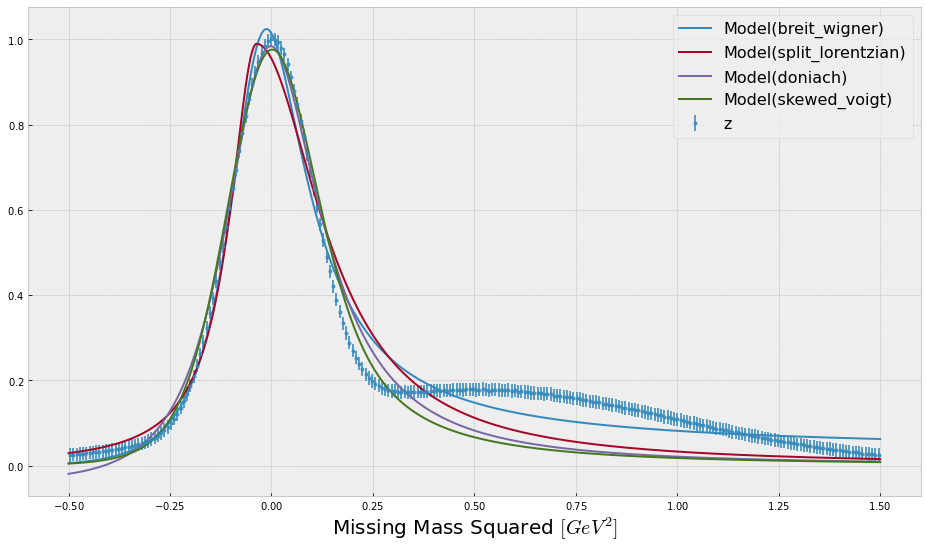

In [7]:
testHist2.errorbar()
testHist2.fitBreitWigner()
testHist2.fitSplitLorentzian()
testHist2.fitDonaich()
out = testHist2.fitSkewedVoigt()

In [9]:
print(testHist2[:])

                          +--------------------------------------------------+
[     -inf,      8746) 0  |                                                  |
[     8746, 1.224e+04) 23 |=========================                         |
[1.224e+04, 1.573e+04) 15 |================                                  |
[1.573e+04, 1.922e+04) 13 |==============                                    |
[1.922e+04, 2.271e+04) 10 |===========                                       |
[2.271e+04, 2.621e+04) 8  |=========                                         |
[2.621e+04,  2.97e+04) 7  |========                                          |
[ 2.97e+04, 3.319e+04) 8  |=========                                         |
[3.319e+04, 3.668e+04) 7  |========                                          |
[3.668e+04, 4.017e+04) 7  |========                                          |
[4.017e+04, 4.366e+04) 6  |=======                                           |
[4.366e+04, 4.716e+04) 6  |=======                  